# 📊 What we found after analyzing 1,000 Amazon Data Science Books 📚

## 🔥 Table of Contents
* [📚 Amazon Data Science Books Dataset](#books-dataset)
* [1. 🔎 Exploratory Data Analysis](#data-analysis)
    * [1.1. 💰 Price vs. Reviews](#analyse-price-reviews)
    * [1.2. 💰 Price vs. Book Length](#analyse-price-book-length)
    * [1.3. 📚 Best Python & Machine Learning Books](#analyse-best-books)
* [2. 🧐 Clustering Book Titles](#clustering-book-titles)
* [3. 🌐 Scraping Amazon Book Reviews](#scraping)

### Useful Python Libraries for Data Science

* **NumPy (Numerical Python)** with powerful N-dimensional array.
* **Pandas (Python Data Analysis)** is heavily used for Data Manipulation and Analysis.
* **Matplotlib** provides powerful and beautiful data visualizations as well as an object-oriented API for embedding those plots into applications. 
* **Plotly Express** is high-level API for creating figures.

In [1]:
!pip install numpy pandas matplotlib plotly

# !pip list

  Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## 📚 Amazon Data Science Books Dataset <a class="anchor" id="books-dataset"></a>

> [This project uses the "Amazon Data Science Books Dataset" available on Kaggle](https://www.kaggle.com/datasets/die9origephit/amazon-data-science-books)

In [3]:
data = pd.read_csv('final_book_dataset_kaggle.csv')
# data.head(n=3)
# data.shape
# data.columns
# print(data.info())

df = pd.DataFrame(data)
print(df)

                                                 title  \
0    Becoming a Data Head: How to Think Speak and U...   
1    Ace the Data Science Interview: 201 Real Inter...   
2    Fundamentals of Data Engineering: Plan and Bui...   
3    Essential Math for Data Science: Take Control ...   
4    Data Science for Business: What You Need to Kn...   
..                                                 ...   
941  The Book of R: A First Course in Programming a...   
942  Basic Business Statistics: A Casebook (Textboo...   
943         Elementary Statistics: Picturing the World   
944  Making Sense of Statistics: A Conceptual Overview   
945                  Psychology Statistics For Dummies   

                                      author   price  pages  avg_reviews  \
0          [Alex J. Gutman,Jordan Goldmeier]   24.49  272.0          4.6   
1                     [Nick Singh,Kevin Huo]   26.00  301.0          4.5   
2                    [Joe Reis,Matt Housley]   50.76  446.0          5.0   

## 1. 🔎 Exploratory Data Analysis <a class="anchor" id="data-analysis"></a>

### 1.1. 💰 Price vs. Reviews <a class="anchor" id="analyse-price-reviews"></a>

> Do more expensive books have better reviews?

In [4]:
# fig = px.scatter(df, x='price', y='avg_reviews', size='n_reviews')
fig = px.scatter(df, x='price', y='avg_reviews', color='pages', size='n_reviews')

fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')

### 1.2. 💰 Price vs. Book Length <a class="anchor" id="analyse-price-book-length"></a>

> Do longer books have higher prices?

In [5]:
# fig = px.scatter(df, x='price', y='avg_reviews', size='pages')
# fig = px.scatter(df, x='price', y='avg_reviews', color='dimensions', size='pages')

# fig.show(renderer='iframe')
# fig.show(renderer='iframe_connected')

### 1.3. 📚 Best Python & Machine Learning Books <a class="anchor" id="analyse-best-books"></a>

> What are the best Python books? What are the best ML books?

In [6]:
## Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Python")]

## Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviews','avg_reviews'])
best_python_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
104,Python Crash Course 2nd Edition: A Hands-On Pr...,[Eric Matthes],21.49,544.0,4.7,7425,0.81,0.13,0.04,0.01,0.01,7 x 1.2 x 9.25 inches,2.3 pounds,English,No Starch Press; 2nd edition (May 3 2019),978-1593279288,/Python-Crash-Course-2nd-Edition/dp/1593279280...,https://www.amazon.com/Python-Crash-Course-2nd...
368,Python: - The Bible- 3 Manuscripts in 1 book: ...,[Maurice J. Thompson],27.97,375.0,4.3,4033,0.64,0.16,0.10,0.04,0.06,6 x 0.85 x 9 inches,1.11 pounds,English,Independently published (April 28 2018),978-1980953906,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
819,Python: For Beginners: A Crash Course Guide To...,[Timothy C. Needham],17.97,135.0,4.3,3034,0.66,0.16,0.10,0.03,0.05,6 x 0.31 x 9 inches,6.7 ounces,English,Independently published (September 21 2017),978-0679722014,/gp/slredirect/picassoRedirect.html/ref=pa_sp_...,https://www.amazon.com/gp/slredirect/picassoRe...
827,Automate the Boring Stuff with Python 2nd Edit...,[Al Sweigart],26.49,592.0,4.7,2538,0.82,0.12,0.03,0.01,0.01,7 x 1.31 x 9.31 inches,2.48 pounds,English,No Starch Press; 2nd edition (November 12 2019),978-1593279929,/Automate-Boring-Stuff-Python-2nd/dp/159327992...,https://www.amazon.com/Automate-Boring-Stuff-P...
320,Python for Everybody: Exploring Data in Python 3,"[Dr. Charles Russell Severance,Sue Blumenberg ...",9.99,247.0,4.6,2467,0.76,0.15,0.05,0.02,0.02,7 x 0.56 x 10 inches,15.2 ounces,English,CreateSpace Independent Publishing Platform (A...,978-1530051120,/Python-Everybody-Exploring-Data/dp/1530051126...,https://www.amazon.com/Python-Everybody-Explor...
218,Python for Data Analysis: Data Wrangling with ...,[William McKinney],53.99,547.0,4.6,1631,0.76,0.15,0.05,0.02,0.02,7 x 1.11 x 9.19 inches,2.08 pounds,English,OReilly Media; 2nd edition (November 14 2017),978-1491957660,/Python-Data-Analysis-Wrangling-IPython/dp/149...,https://www.amazon.com/Python-Data-Analysis-Wr...
428,Deep Learning with Python,[Francois Chollet],32.49,384.0,4.6,1349,0.76,0.13,0.04,0.02,0.04,7.38 x 0.8 x 9.25 inches,1.59 pounds,English,Manning; 1st edition (December 22 2017),978-1617294433,/Deep-Learning-Python-Francois-Chollet/dp/1617...,https://www.amazon.com/Deep-Learning-Python-Fr...


In [7]:
## Select books based on title containing "Machine Learning"
ml_books = df[df['title'].str.contains("Machine Learning")]

## ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviews', 'avg_reviews'])
best_ml_books

,title,author,price,pages,avg_reviews,n_reviews,star5,star4,star3,star2,star1,dimensions,weight,language,publisher,ISBN_13,link,complete_link
400,Deep Learning (Adaptive Computation and Machin...,NaN,54.25,800.0,4.3,1862,0.73,0.10,0.05,0.04,0.08,9.1 x 7.2 x 1.1 inches,2.54 pounds,English,The MIT Press; Illustrated edition (November 1...,978-0262035613,/Deep-Learning-Adaptive-Computation-Machine/dp...,https://www.amazon.com/Deep-Learning-Adaptive-...
200,The Hundred-Page Machine Learning Book,[Andriy Burkov],31.99,160.0,4.6,816,0.81,0.10,0.04,0.02,0.03,7.5 x 0.38 x 9.25 inches,13.8 ounces,English,Andriy Burkov (January 13 2019),978-1999579500,/Hundred-Page-Machine-Learning-Book/dp/1999579...,https://www.amazon.com/Hundred-Page-Machine-Le...
571,Pattern Recognition and Machine Learning (Info...,[Christopher M. Bishop],76.10,738.0,4.6,663,0.76,0.13,0.06,0.03,0.02,7.7 x 1.3 x 10.2 inches,4.73 pounds,English,Springer (August 17 2006),978-0387310732,/sspa/click?ie=UTF8&spc=MTo1MjMzODUwNDM1MTQ1Nj...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...
215,Mathematics for Machine Learning,NaN,46.54,398.0,4.7,580,0.80,0.13,0.03,0.02,0.02,7 x 0.92 x 10 inches,1.76 pounds,English,Cambridge University Press; 1st edition (April...,978-1108455145,/Mathematics-Machine-Learning-Peter-Deisenroth...,https://www.amazon.com/Mathematics-Machine-Lea...
559,Introduction to Machine Learning with Python: ...,NaN,45.00,398.0,4.5,565,0.76,0.14,0.03,0.03,0.04,7 x 0.82 x 9.19 inches,1.3 pounds,English,OReilly Media; 1st edition (November 15 2016),978-1449369415,/Introduction-Machine-Learning-Python-Scientis...,https://www.amazon.com/Introduction-Machine-Le...
567,Advances in Financial Machine Learning,[Marcos Lopez de Prado],40.49,400.0,4.5,514,0.76,0.09,0.07,0.03,0.05,6.1 x 1.1 x 9 inches,1.6 pounds,English,Wiley; 1st edition (February 21 2018),978-1119482086,/Advances-Financial-Machine-Learning-Marcos/dp...,https://www.amazon.com/Advances-Financial-Mach...
608,Reinforcement Learning second edition: An Intr...,NaN,66.44,552.0,4.6,460,0.82,0.08,0.02,0.02,0.06,7.25 x 1.48 x 9.31 inches,2.6 pounds,English,Bradford Books; second edition (November 13 2018),978-0262039246,/Reinforcement-Learning-Introduction-Adaptive-...,https://www.amazon.com/Reinforcement-Learning-...


## 2. 💎 Clustering Book Titles <a class="anchor" id="clustering-book-titles"></a>

> Cluster Analysis of book names / TF-IDF and K-Means

> 💡 What are the main types of Data Science books?

In [8]:
## Install sklearn if not done already!

!pip install scikit-learn

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

In [10]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,001,10,10 machine,100,100 essential,100 recipes,100 solved,101,101 data,1098,...,youll likely,young,young children,youtube,youâ,youâ new,zed,zed shaws,²s,²s statistics
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
944,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=600, n_init=10)
   km.fit(X)
   sum_of_squared_distances.append(km.inertia_)

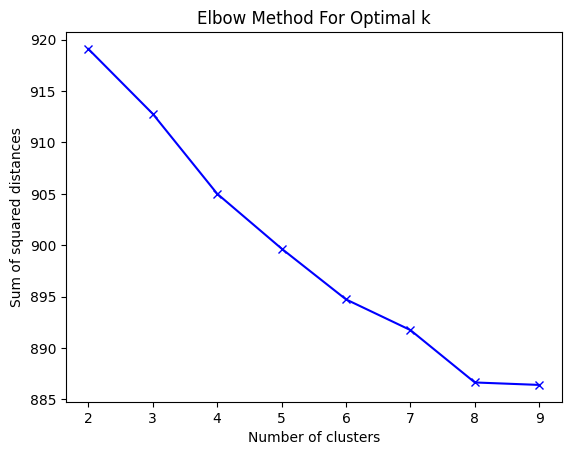

In [12]:
# plt.plot(K, sum_of_squared_distances, 'bx-')

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [13]:
## Get clusters
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

## Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
460  R Deep Learning Essentials: A step--step guide...        0
557  Hands-On Deep Learning with Apache Spark: Buil...        0
556  Essentials of Deep Learning and AI: Experience...        0
554  Deep Reinforcement Learning with Python: Maste...        0
553  Synthetic Data for Deep Learning (Springer Opt...        0
..                                                 ...      ...
847                           Essentials of Statistics        5
682            Advanced Statistics for Health Research        5
845  AP Statistics Flashcards Fourth Edition: Up-to...        5
863  Introduction to Probability (Cambridge Mathema...        5
945                  Psychology Statistics For Dummies        5

[946 rows x 2 columns]


In [16]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 3.6 MB/s eta 0:00:003.1 MB/s eta 0:00:01


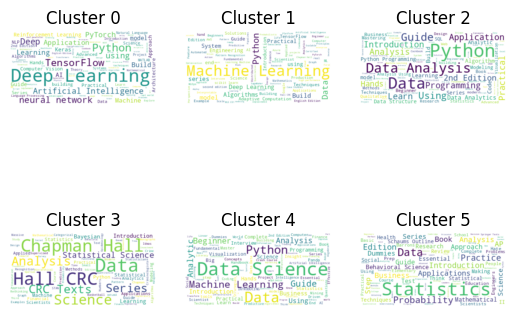

In [17]:
## Create Wordclouds for Clusters
from wordcloud import WordCloud

for k in range(true_k):
   text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   ## Create subplot
   plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
   plt.plot()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
plt.show()

In [18]:
cluster_num = '1'

In [19]:
## Books in clusters
book_cl[book_cl.cluster == int(cluster_num)]

,title,cluster
16,Machine Learning Design Interview: Machine Lea...,1
25,Data-Driven Science and Engineering: Machine L...,1
48,The Machine Learning Solutions Architect Handb...,1
64,Introduction to Machine Learning with R: Rigor...,1
96,Machine Learning for Time Series Forecasting w...,1
...,...,...
688,Introduction to Machine Learning fourth editio...,1
691,Practical Simulations for Machine Learning: Us...,1
692,Machine Learning: A First Course for Engineers...,1
759,Interpretable Machine Learning with Python: Bu...,1


In [20]:
## Prediction on unseen data
test = vectorizer.transform(['Tensorflow Deep learning'])
model.predict(test)[0]

0

## 3. 🌐 Scraping Amazon Book Reviews <a class="anchor" id="scraping"></a>

> Amazon review scraping & Book review summary

In [21]:
## Example urls
product_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/dp/1119741742/"
reviews_url = "https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

In [22]:
def get_review_url(product_url):
    try:
        split_url = product_url.split('dp')
        product_number = split_url[1].split('/')[1]
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
    except:
        review_url = None
    return review_url

In [23]:
## Create review urls for each book in dataset
df['review_urls'] = df['complete_link'].apply(lambda x: get_review_url(x))

## Remove empty review urls and create a new dataset
df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [24]:
!pip install requests
# !pip install lxml

In [ ]:
## Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df_reviews['review_urls']
book_titles = df_reviews['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    # soup = BeautifulSoup(page_html, "lxml")
    ## BeautifulSoup(markup,"html.parser") --> Python HTML parser
    soup = BeautifulSoup(page_html, features="html.parser")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df_reviews['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%h')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

INFO:root:https://www.amazon.com/Becoming-Data-Head-Understand-Statistics/product-reviews/1119741742/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Ace-Data-Science-Interview-Questions/product-reviews/0578973839/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Fundamentals-Data-Engineering-Robust-Systems/product-reviews/1098108302/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Essential-Math-Data-Science-Fundamental/product-reviews/1098102932/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Data-Science-Business-Data-Analytic-Thinking/product-reviews/1449361323/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.com/Data-Science-Scratch-Principles-Python/product-reviews/1492041130/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazo

In [ ]:
# book_reviews = pd.read_csv('book_reviews_2022-12-14-12.csv')
csv_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%h')}.csv"
book_reviews = pd.read_csv(csv_name)

## Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
book_reviews_agg

In [ ]:
## Install Bert extractive summarizer if not done already!

!pip install bert-extractive-summarizer
# !pip install transformers summarizer
# !pip uninstall summarizer

# import transformers, torch, tensorflow
# from platform import python_version
# print("python={}".format(python_version()))
# print("transformers=={}\ntorch=={}\ntensorflow=={}\n".
#       format(transformers.__version__, torch.__version__, tensorflow.__version__ ))

## ~~Book Reviews Summarization~~

In [ ]:
## Summarizing book reviews
# from summarizer import Summarizer

# bert_model = Summarizer()
# bert_summary = ''.join(bert_model(book_reviews_agg.review_text[2], ratio=0.2))
# print(bert_summary)

In [ ]:
# print(book_reviews_agg.review_text[2])

In [ ]:
# from IPython.display import display, Markdown
# display(Markdown(book_reviews_agg.review_text[2]))

In [ ]:
# display(Markdown(bert_summary))